In [2]:
import os

# 获取当前工作路径
current_path = os.getcwd()
print("当前工作路径：", current_path)

当前工作路径： d:\nudt_edu\master_code


图表已保存为 experimental_results3.pdf


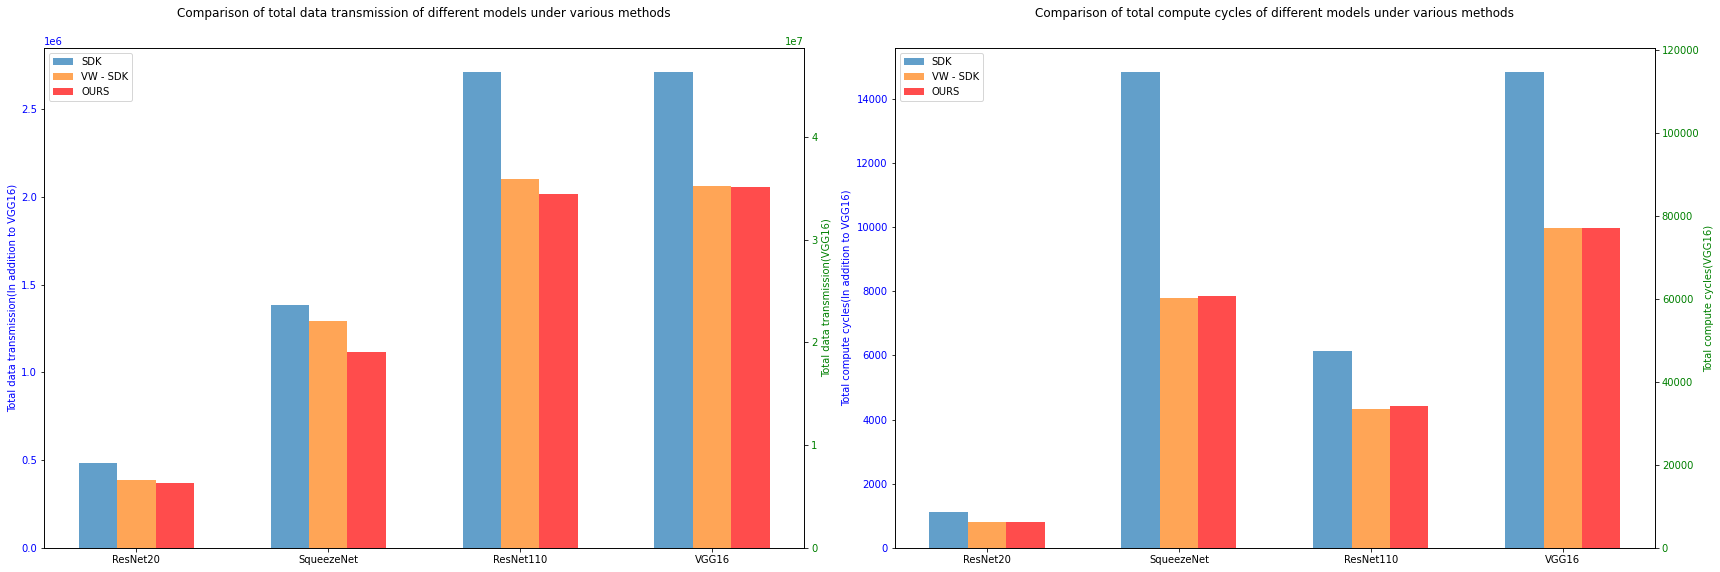

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# 原始数据，去掉 Im2col
# data1 = {
#     'Model': ['ResNet20', 'SqueezeNet', 'ResNet110', 'VGG16'],
#     'SDK': [481900, 1381648, 2711020, 46322224],
#     'VW - SDK': [384488, 1294576, 2100968, 35187024],
#     'OURS': [356528, 1088320, 1923248, 32972352]
# }
data1 = {
    'Model': ['ResNet20', 'SqueezeNet', 'ResNet110', 'VGG16'],
    'SDK': [481900, 1381648, 2711084, 46322224],
    'VW - SDK': [384488, 1294576, 2101032, 35187024],
    'OURS': [369968, 1116832, 2017392, 35075136]
}

# 新数据，去掉 Im2col
data2 = {
    'Model': ['ResNet20', 'SqueezeNet', 'ResNet110', 'VGG16'],
    'SDK': [1120, 14843, 6130, 114697],
    'VW - SDK': [804, 7802, 4345, 77102],
    'OURS': [814, 7840, 4415, 77102]
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 创建一个包含两个子图的画布
fig, axes = plt.subplots(1, 2, figsize=(24, 8))

# 第一个子图：原始数据
ax1 = axes[0]
# 绘制除VGG16外其他模型的柱状图
df1_except_vgg16 = df1[df1['Model'] != 'VGG16']
bar_width = 0.2
index = range(len(df1_except_vgg16))
for i, col in enumerate(df1_except_vgg16.columns[1:]):
    if col == 'OURS':
        ax1.bar([pos + i * bar_width for pos in index], df1_except_vgg16[col], width=bar_width,
                label=col, color='red', alpha=0.7)
    else:
        ax1.bar([pos + i * bar_width for pos in index], df1_except_vgg16[col], width=bar_width,
                label=col, alpha=0.7)

# 设置主坐标轴标签等
ax1.set_ylabel('Total data transmission(In addition to VGG16)', color='blue')
# 设置标题并指定y参数确保对齐
ax1.set_title('Comparison of total data transmission of different models under various methods', y=1.05)
# 调整 x 轴刻度位置，包含 VGG16 的位置
x_ticks_pos = [pos + bar_width * (len(df1.columns) - 2) / 2 for pos in index] + [len(df1_except_vgg16) + bar_width * (len(df1.columns) - 2) / 2]
# 调整 x 轴刻度标签，包含 VGG16
x_tick_labels = list(df1_except_vgg16['Model']) + ['VGG16']
ax1.set_xticks(x_ticks_pos)
ax1.set_xticklabels(x_tick_labels)
ax1.tick_params(axis='y', labelcolor='blue')

# 创建副坐标轴
ax1_secondary = ax1.twinx()
# 绘制VGG16的柱状图
vgg16_data1 = df1[df1['Model'] == 'VGG16'].set_index('Model')
for i, col in enumerate(vgg16_data1.columns):
    if col == 'OURS':
        ax1_secondary.bar([len(df1_except_vgg16) + i * bar_width], vgg16_data1[col].values[0], width=bar_width,
                          color='red', alpha=0.7)
    else:
        ax1_secondary.bar([len(df1_except_vgg16) + i * bar_width], vgg16_data1[col].values[0], width=bar_width,
                          alpha=0.7)

# 设置副坐标轴标签等
ax1_secondary.set_ylabel('Total data transmission(VGG16)', color='green')
ax1_secondary.tick_params(axis='y', labelcolor='green')

# 添加图例（保持原位置）
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_secondary.get_legend_handles_labels()
ax1_secondary.legend(lines + lines2, labels + labels2, loc='upper left')

# 第二个子图：新数据
ax2 = axes[1]
# 绘制除VGG16外其他模型的柱状图
df2_except_vgg16 = df2[df2['Model'] != 'VGG16']
bar_width = 0.2
index = range(len(df2_except_vgg16))
for i, col in enumerate(df2_except_vgg16.columns[1:]):
    if col == 'OURS':
        ax2.bar([pos + i * bar_width for pos in index], df2_except_vgg16[col], width=bar_width,
                label=col, color='red', alpha=0.7)
    else:
        ax2.bar([pos + i * bar_width for pos in index], df2_except_vgg16[col], width=bar_width,
                label=col, alpha=0.7)

# 设置主坐标轴标签等
ax2.set_ylabel('Total compute cycles(In addition to VGG16)', color='blue')
# 设置标题并指定相同的y参数确保对齐
ax2.set_title('Comparison of total compute cycles of different models under various methods', y=1.05)
# 调整 x 轴刻度位置，包含 VGG16 的位置
x_ticks_pos = [pos + bar_width * (len(df2.columns) - 2) / 2 for pos in index] + [len(df2_except_vgg16) + bar_width * (len(df2.columns) - 2) / 2]
# 调整 x 轴刻度标签，包含 VGG16
x_tick_labels = list(df2_except_vgg16['Model']) + ['VGG16']
ax2.set_xticks(x_ticks_pos)
ax2.set_xticklabels(x_tick_labels)
ax2.tick_params(axis='y', labelcolor='blue')

# 创建副坐标轴
ax2_secondary = ax2.twinx()
# 绘制VGG16的柱状图
vgg16_data2 = df2[df2['Model'] == 'VGG16'].set_index('Model')
for i, col in enumerate(vgg16_data2.columns):
    if col == 'OURS':
        ax2_secondary.bar([len(df2_except_vgg16) + i * bar_width], vgg16_data2[col].values[0], width=bar_width,
                          color='red', alpha=0.7)
    else:
        ax2_secondary.bar([len(df2_except_vgg16) + i * bar_width], vgg16_data2[col].values[0], width=bar_width,
                          alpha=0.7)

# 设置副坐标轴标签等
ax2_secondary.set_ylabel('Total compute cycles(VGG16)', color='green')
ax2_secondary.tick_params(axis='y', labelcolor='green')

# 添加图例（保持原位置）
lines, labels = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_secondary.get_legend_handles_labels()
ax2_secondary.legend(lines + lines2, labels + labels2, loc='upper left')

# 调整布局避免标签重叠等问题
plt.tight_layout()

# 保存为 PDF
pdf_path = 'experimental_results3.pdf'
with PdfPages(pdf_path) as pdf:
    pdf.savefig(fig)

print(f"图表已保存为 {pdf_path}")
    

In [11]:
import os

def read_net_mapping_strategy(network_name, param1, param2):
    """
    按行读取文件，将每行内容拆分并转换为数字（尽可能）
    
    参数:
        network_name (str): 网络名称，如"Resnet20"
        param1 (int): 第一个数字参数，如512
        param2 (int): 第二个数字参数，如512
    
    返回:
        list: 处理后的内容列表，每个元素为一行的拆分结果（列表）
              其中可转换为数字的元素会被转为int或float，其余保持字符串
        None: 若文件不存在或读取失败
    """
    try:
        # 拼接文件路径
        filename = f"NetWork_{network_name}_{param1}_{param2}_cof.csv"
        file_path = os.path.join(".", network_name, filename)
        
        # 检查文件是否存在
        if not os.path.exists(file_path):
            print(f"错误：文件不存在 - {file_path}")
            return None
        
        result = []
        with open(file_path, mode='r', encoding='utf-8') as file:
            for line_num, line in enumerate(file, 1):
                # 去除首尾空白字符（包括换行符）
                cleaned_line = line.strip()
                
                # 按常见分隔符（逗号、空格、制表符）拆分
                # 优先按逗号拆分（适合CSV文件），其次按空白字符
                if ',' in cleaned_line:
                    parts = [p.strip() for p in cleaned_line.split(',')]
                else:
                    parts = cleaned_line.split()
                
                # 尝试将每个部分转换为数字
                processed_parts = []
                for part in parts:
                    # 尝试转换为整数
                    try:
                        processed_parts.append(int(part))
                        continue
                    except ValueError:
                        pass
                    
                    # 尝试转换为浮点数
                    try:
                        processed_parts.append(float(part))
                        continue
                    except ValueError:
                        pass
                    
                    # 无法转换则保留原始字符串
                    processed_parts.append(part)
                
                result.append(processed_parts)
        
        print(f"成功读取并处理文件：{file_path}，共{len(result)}行")
        return result
    
    except Exception as e:
        print(f"读取文件时发生错误：{str(e)}")
        return None

data = read_net_mapping_strategy("Resnet20", 512, 512)



成功读取并处理文件：.\Resnet20\NetWork_Resnet20_512_512_cof.csv，共20行


In [26]:
import os
import csv

def read_net_mapping_strategy(network_name, param1, param2):
    """
    按行读取文件,将每行内容拆分并转换为数字(尽可能)
    
    参数:
        network_name (str):网络名称,如"Resnet20"
        param1 (int):第一个数字参数,如512
        param2 (int):第二个数字参数,如512
    
    返回:
        list:处理后的内容列表,每个元素为一行的拆分结果(列表)
              其中可转换为数字的元素会被转为int或float,其余保持字符串
        None:若文件不存在或读取失败
    """
    try:
        # 拼接文件路径
        filename = f"NetWork_{network_name}_{param1}_{param2}_cof.csv"
        file_path = os.path.join(".", network_name, filename)
        
        # 检查文件是否存在
        if not os.path.exists(file_path):
            print(f"错误:文件不存在 - {file_path}")
            return None
        with open('NetWork_'+network_name+'.csv', newline='', encoding='utf-8') as f:
            net = list(csv.reader(f, delimiter=',', quotechar='"'))
        
        result = []
        with open(file_path, mode='r', encoding='utf-8') as file:
            for line_num, line in enumerate(file, 1):
                # 去除首尾空白字符(包括换行符)
                cleaned_line = line.strip()
                
                # 按常见分隔符(逗号、空格、制表符)拆分
                # 优先按逗号拆分(适合CSV文件),其次按空白字符
                if ',' in cleaned_line:
                    parts = [p.strip() for p in cleaned_line.split(',')]
                else:
                    parts = cleaned_line.split()
                
                # 尝试将每个部分转换为数字
                processed_parts = []
                for part in parts:
                    # 尝试转换为整数
                    try:
                        processed_parts.append(int(part))
                        continue
                    except ValueError:
                        pass
                    
                    # 尝试转换为浮点数
                    try:
                        processed_parts.append(float(part))
                        continue
                    except ValueError:
                        pass
                    
                    # 无法转换则保留原始字符串
                    processed_parts.append(part)
                
                result.append(processed_parts)
        
        print(f"成功读取并处理文件:{file_path},共{len(result)}行")
        return result,net
    
    except Exception as e:
        print(f"读取文件时发生错误:{str(e)}")
        return None


map,net = read_net_mapping_strategy("Resnet20", 512, 512)
map

成功读取并处理文件:.\Resnet20\NetWork_Resnet20_512_512_cof.csv,共20行


[[5040.0, 30, 1, 7.0, 8.0, 3.0, 16.0],
 [26880.0, 60, 2, 7.0, 8.0, 9, 16.0],
 [26880.0, 60, 2, 7.0, 8.0, 9, 16.0],
 [26880.0, 60, 2, 7.0, 8.0, 9, 16.0],
 [26880.0, 60, 2, 7.0, 8.0, 9, 16.0],
 [26880.0, 60, 2, 7.0, 8.0, 9, 16.0],
 [26880.0, 60, 2, 7.0, 8.0, 9, 16.0],
 [38400.0, 75, 1, 4.0, 8.0, 16.0, 32.0],
 [18816.0, 42, 2, 4.0, 7.0, 18, 32.0],
 [18816.0, 42, 2, 4.0, 7.0, 18, 32.0],
 [18816.0, 42, 2, 4.0, 7.0, 18, 32.0],
 [18816.0, 42, 2, 4.0, 7.0, 18, 32.0],
 [18816.0, 42, 2, 4.0, 7.0, 18, 32.0],
 [25088.0, 49, 1, 4.0, 4.0, 32.0, 64.0],
 [9216.0, 18, 2, 4.0, 4.0, 32, 64.0],
 [9216.0, 18, 2, 4.0, 4.0, 32, 64.0],
 [9216.0, 18, 2, 4.0, 4.0, 32, 64.0],
 [9216.0, 18, 2, 4.0, 4.0, 32, 64.0],
 [9216.0, 18, 2, 4.0, 4.0, 32, 64.0],
 [64.0, 1.0, 1, 1.0, 1.0, 64.0, 10.0]]

In [29]:
len(map)

20

In [37]:
def calculate_transferpath(map_strategy,net,quantization_bit):
    all_transfer_path = []
    # path_record = []
    for i in range(len(map_strategy)-1):
        all_transmission = int(net[i][0])*int(net[i][1])*int(net[i][2])*quantization_bit

        all_transfer_path.append([all_transmission,map_strategy[i][2],map_strategy[i+1][2]])

    return all_transfer_path

all=calculate_transferpath(map,net,8)

In [41]:
all

[[24576, 1, 2],
 [131072, 2, 2],
 [131072, 2, 2],
 [131072, 2, 2],
 [131072, 2, 2],
 [131072, 2, 2],
 [131072, 2, 1],
 [131072, 1, 2],
 [65536, 2, 2],
 [65536, 2, 2],
 [65536, 2, 2],
 [65536, 2, 2],
 [65536, 2, 1],
 [65536, 1, 2],
 [32768, 2, 2],
 [32768, 2, 2],
 [32768, 2, 2],
 [32768, 2, 2],
 [32768, 2, 1]]

In [40]:
total_num_arrays = all[0][1] + all[0][2]
for i in range(1,len(all)):
    total_num_arrays = total_num_arrays + all[i][2]
total_num_arrays

36

In [45]:
def allocate_chips(layers_data,remaining_resources):
    """
    按完整层分配芯片资源，记录每块芯片的起始层和结束层（均为完整映射）
    
    参数:
        layers_data (list): 每层的参数列表，每个元素为一行数据的拆分结果
    
    返回:
        list: 芯片分配信息，每个元素为一块芯片的分配详情
              格式: {
                  'chip_id': 芯片编号,
                  'start_layer': 起始层索引(1-based),
                  'end_layer': 结束层索引(1-based),
                  'end_layer_complete': 始终为True(因为只包含完整层),
                  'used_resources': 该芯片使用的资源总数
              }
    """
    chips = []                  # 存储所有芯片的分配信息
    current_chip_id = 0         # 当前芯片编号
    current_start_layer = None  # 当前芯片的起始层(1-based)
    current_used_resources = 0  # 当前芯片已使用资源数
    
    for layer_idx, layer in enumerate(layers_data):
        layer_num = layer_idx + 1  # 转换为1-based索引
        # 提取当前层需要的资源个数（每行第三个数字）
        required = layer[2]
        if not isinstance(required, (int, float)):
            print(f"警告：第{layer_num}层的资源参数不是数字，跳过处理")
            continue
        required = int(required)  # 确保是整数
        
        # 检查当前层是否能放入当前芯片
        if required > 16:
            print(f"警告：第{layer_num}层需要{required}个资源，超过单芯片最大容量16，无法分配")
            continue
            
        if remaining_resources >= required:
            # 可以放入当前芯片
            if current_start_layer is None:
                current_start_layer = layer_num
            remaining_resources -= required
            current_used_resources += required
        else:
            # 无法放入当前芯片，新建芯片
            # 记录当前芯片
            if current_start_layer is not None:
                chips.append({
                    'chip_id': current_chip_id,
                    'start_layer': current_start_layer,
                    'end_layer': layer_num - 1,
                    'end_layer_complete': True,
                    'used_resources': current_used_resources
                })
            
            # 初始化新芯片
            current_chip_id += 1
            current_start_layer = layer_num
            remaining_resources = 16 - required
            current_used_resources = required
    
    # 记录最后一个芯片
    if current_start_layer is not None:
        chips.append({
            'chip_id': current_chip_id,
            'start_layer': current_start_layer,
            'end_layer': len(layers_data),
            'end_layer_complete': True,
            'used_resources': current_used_resources
        })
    
    return chips

# 示例数据（与问题中给出的数据对应）
layers_data = [
    [5040.0, 30, 1, 7.0, 8.0, 3.0, 16.0],
    [26880.0, 60, 2, 7.0, 8.0, 9, 16.0],
    [26880.0, 60, 2, 7.0, 8.0, 9, 16.0],
    [26880.0, 60, 2, 7.0, 8.0, 9, 16.0],
    [26880.0, 60, 2, 7.0, 8.0, 9, 16.0],
    [26880.0, 60, 2, 7.0, 8.0, 9, 16.0],
    [26880.0, 60, 2, 7.0, 8.0, 9, 16.0],
    [38400.0, 75, 1, 4.0, 8.0, 16.0, 32.0],
    [18816.0, 42, 2, 4.0, 7.0, 18, 32.0],
    [18816.0, 42, 2, 4.0, 7.0, 18, 32.0],
    [18816.0, 42, 2, 4.0, 7.0, 18, 32.0],
    [18816.0, 42, 2, 4.0, 7.0, 18, 32.0],
    [18816.0, 42, 2, 4.0, 7.0, 18, 32.0],
    [25088.0, 49, 1, 4.0, 4.0, 32.0, 64.0],
    [9216.0, 18, 2, 4.0, 4.0, 32, 64.0],
    [9216.0, 18, 2, 4.0, 4.0, 32, 64.0],
    [9216.0, 18, 2, 4.0, 4.0, 32, 64.0],
    [9216.0, 18, 2, 4.0, 4.0, 32, 64.0],
    [9216.0, 18, 2, 4.0, 4.0, 32, 64.0],
    [64.0, 1.0, 1, 1.0, 1.0, 64.0, 10.0]
]

# 执行分配
chip_allocations = allocate_chips(layers_data,16)

# 打印分配结果
print("芯片资源分配结果：")
print(f"{'芯片ID':<8} {'起始层':<8} {'结束层':<8} {'结束层完全映射':<16} {'使用资源数':<10}")
print("-" * 60)
for chip in chip_allocations:
    print(f"{chip['chip_id']:<8} {chip['start_layer']:<8} {chip['end_layer']:<8} "
          f"{str(chip['end_layer_complete']):<16} {chip['used_resources']:<10}")


芯片资源分配结果：
芯片ID     起始层      结束层      结束层完全映射          使用资源数     
------------------------------------------------------------
0        1        9        True             16        
1        10       17       True             15        
2        18       20       True             5         


In [46]:
def allocate_chips(layers_data):
    """详细的芯片资源分配，处理层的部分映射情况"""
    chips = []
    current_chip_id = 0
    remaining_resources = 16
    current_start_layer = None
    
    for layer_idx, layer in enumerate(layers_data):
        layer_num = layer_idx + 1
        required = int(layer[2])  # 第三列是资源需求
        
        if current_start_layer is None:
            current_start_layer = layer_num
        
        if remaining_resources >= required:
            # 可以完全放入当前芯片
            remaining_resources -= required
            # 检查是否是最后一层
            if layer_idx == len(layers_data) - 1:
                chips.append({
                    'chip_id': current_chip_id,
                    'start_layer': current_start_layer,
                    'end_layer': layer_num,
                    'end_layer_complete': True,
                    'end_layer_resources': 0
                })
        else:
            # 不能完全放入当前芯片
            chips.append({
                'chip_id': current_chip_id,
                'start_layer': current_start_layer,
                'end_layer': layer_num,
                'end_layer_complete': False,
                'end_layer_resources': remaining_resources
            })
            
            # 新芯片
            current_chip_id += 1
            current_start_layer = layer_num
            remaining_resources = 16 - (required - remaining_resources)
            
            # 如果是最后一层
            if layer_idx == len(layers_data) - 1:
                chips.append({
                    'chip_id': current_chip_id,
                    'start_layer': current_start_layer,
                    'end_layer': layer_num,
                    'end_layer_complete': True,
                    'end_layer_resources': 0
                })
    
    # 处理最后一个芯片
    if current_start_layer is not None and (not chips or chips[-1]['end_layer'] != len(layers_data)):
        chips.append({
            'chip_id': current_chip_id,
            'start_layer': current_start_layer,
            'end_layer': len(layers_data),
            'end_layer_complete': True,
            'end_layer_resources': 0
        })
    
    return chips

# 示例数据
layers_data = [
    [5040.0, 30, 1, 7.0, 8.0, 3.0, 16.0],
    [26880.0, 60, 2, 7.0, 8.0, 9, 16.0],
    [26880.0, 60, 2, 7.0, 8.0, 9, 16.0],
    [26880.0, 60, 2, 7.0, 8.0, 9, 16.0],
    [26880.0, 60, 2, 7.0, 8.0, 9, 16.0],
    [26880.0, 60, 2, 7.0, 8.0, 9, 16.0],
    [26880.0, 60, 2, 7.0, 8.0, 9, 16.0],
    [38400.0, 75, 1, 4.0, 8.0, 16.0, 32.0],
    [18816.0, 42, 2, 4.0, 7.0, 18, 32.0],
    [18816.0, 42, 2, 4.0, 7.0, 18, 32.0],
    [18816.0, 42, 2, 4.0, 7.0, 18, 32.0],
    [18816.0, 42, 2, 4.0, 7.0, 18, 32.0],
    [18816.0, 42, 2, 4.0, 7.0, 18, 32.0],
    [25088.0, 49, 1, 4.0, 4.0, 32.0, 64.0],
    [9216.0, 18, 2, 4.0, 4.0, 32, 64.0],
    [9216.0, 18, 2, 4.0, 4.0, 32, 64.0],
    [9216.0, 18, 2, 4.0, 4.0, 32, 64.0],  # 第17层
    [9216.0, 18, 2, 4.0, 4.0, 32, 64.0],
    [9216.0, 18, 2, 4.0, 4.0, 32, 64.0],
    [64.0, 1.0, 1, 1.0, 1.0, 64.0, 10.0]
]

# 执行分配
chip_allocations = allocate_chips(layers_data)

# 打印分配结果
print("芯片资源分配结果：")
print(f"{'芯片ID':<8} {'起始层':<8} {'结束层':<8} {'结束层完全映射':<16} {'结束层分配资源数':<16}")
print("-" * 65)
for chip in chip_allocations:
    print(f"{chip['chip_id']:<8} {chip['start_layer']:<8} {chip['end_layer']:<8} "
          f"{str(chip['end_layer_complete']):<16} "
          f"{chip['end_layer_resources'] if not chip['end_layer_complete'] else '-':<16}")


芯片资源分配结果：
芯片ID     起始层      结束层      结束层完全映射          结束层分配资源数        
-----------------------------------------------------------------
0        1        10       False            0               
1        10       18       False            1               
2        18       20       True             -               
